4.1 Importing libraries and Dataset

In [1]:
#Importing all neccessary libraires and modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn
import nltk
import os
import random
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import os, sys, email,re
print(os.listdir("../input"))



['emails.csv']


In [2]:
#reading data
df = pd.read_csv('../input/emails.csv',nrows = 35000)
df.shape

(35000, 2)

4.2 Data Analysis

In [3]:
# create list of email objects
emails = list(map(email.parser.Parser().parsestr,df['message']))

# extract headings such as subject, from, to etc..
headings  = emails[0].keys()

# Goes through each email and grabs info for each key
# doc['From'] grabs who sent email in all emails
for key in headings:
    df[key] = [doc[key] for doc in emails]

In [4]:
emails

 ...]

In [5]:
headings

['Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName']

In [14]:
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,user
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [6]:
##Useful functions
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

df['body'] = list(map(get_raw_text, emails))
df.head()
df['user'] = df['file'].map(lambda x: x.split('/')[0])

In [7]:
df['body']

0                                Here is our forecast\n\n 
1        Traveling to have a business meeting takes the...
2                           test successful.  way to go!!!
3        Randy,\n\n Can you send me a schedule of the s...
4                      Let's shoot for Tuesday at 11:45.  
5        Greg,\n\n How about either next Tuesday or Thu...
6        Please cc the following distribution list with...
7                         any morning between 10 and 11:30
8        1. login:  pallen pw: ke9davis\n\n I don't thi...
9        ---------------------- Forwarded by Phillip K ...
10       Mr. Buckner,\n\n For delivered gas behind San ...
11       Lucy,\n\n Here are the rentrolls:\n\n\n\n Open...
12       ---------------------- Forwarded by Phillip K ...
13       ---------------------- Forwarded by Phillip K ...
14       Dave, \n\n Here are the names of the west desk...
15                Paula,\n\n 35 million is fine\n\nPhillip
16       ---------------------- Forwarded by Phillip K .

In [8]:
df['user']

0        allen-p
1        allen-p
2        allen-p
3        allen-p
4        allen-p
5        allen-p
6        allen-p
7        allen-p
8        allen-p
9        allen-p
10       allen-p
11       allen-p
12       allen-p
13       allen-p
14       allen-p
15       allen-p
16       allen-p
17       allen-p
18       allen-p
19       allen-p
20       allen-p
21       allen-p
22       allen-p
23       allen-p
24       allen-p
25       allen-p
26       allen-p
27       allen-p
28       allen-p
29       allen-p
          ...   
34970    blair-l
34971    blair-l
34972    blair-l
34973    blair-l
34974    blair-l
34975    blair-l
34976    blair-l
34977    blair-l
34978    blair-l
34979    blair-l
34980    blair-l
34981    blair-l
34982    blair-l
34983    blair-l
34984    blair-l
34985    blair-l
34986    blair-l
34987    blair-l
34988    blair-l
34989    blair-l
34990    blair-l
34991    blair-l
34992    blair-l
34993    blair-l
34994    blair-l
34995    blair-l
34996    blair-l
34997    blair

In [16]:
#converting object to datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True,utc=True)
df.head()
df.dtypes

file                                      object
message                                   object
Message-ID                                object
Date                         datetime64[ns, UTC]
From                                      object
To                                        object
Subject                                   object
Mime-Version                              object
Content-Type                              object
Content-Transfer-Encoding                 object
X-From                                    object
X-To                                      object
X-cc                                      object
X-bcc                                     object
X-Folder                                  object
X-Origin                                  object
X-FileName                                object
body                                      object
user                                      object
dtype: object

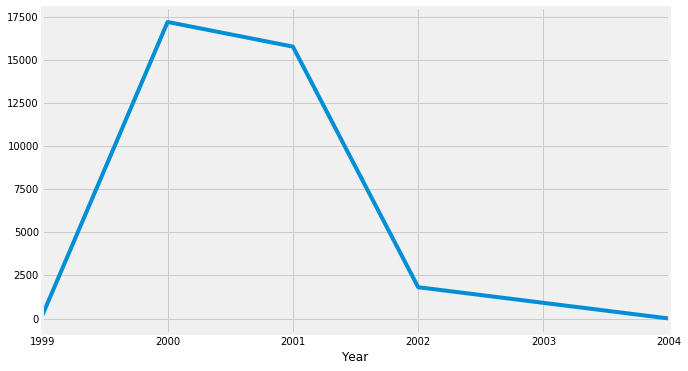

In [18]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.dayofweek

# reduce the sample period
# looks like the total number of emails really ramped up in 2000 and 2001
indices = (df['Year'] > 1995) & (df['Year'] <= 2004)
plt.figure(figsize = (10,6))
figure1 = df.loc[indices].groupby('Year')['body'].count().plot()

In [47]:
df.Year.agg({'max': max, 'min': min})
# really should not be dates up to 2044
df[df['Year']==2044]

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,user,Month,Year,Day


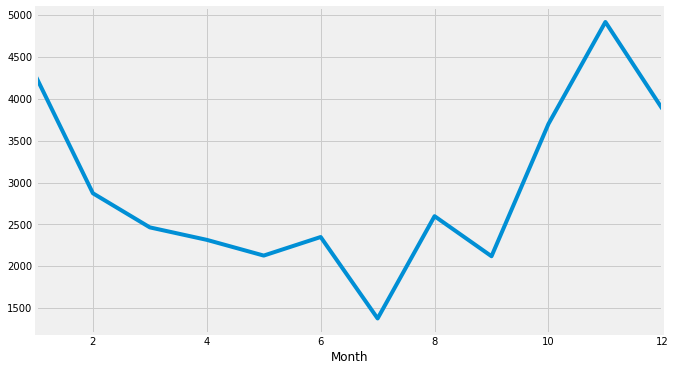

In [19]:
#how many mails were there in each months
plt.figure(figsize = (10,6))
figure2 = df.groupby('Month')['body'].count().plot()

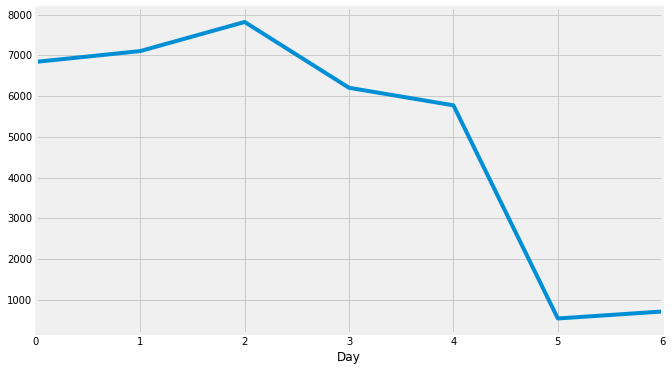

In [20]:
#mails on weekly basis day wise
plt.figure(figsize = (10,6))
figure3 = df.groupby('Day')['body'].count().plot()

In [21]:
#Unique to and From
print('Total number of emails: %d' %len(df))
print('------------')
print('Number of unique received: %d '%df['To'].nunique())
print('------------')
print('Number of unique Sent: %d '%df['From'].nunique())

Total number of emails: 35000
------------
Number of unique received: 4926 
------------
Number of unique Sent: 2151 


 Most frequent Senders and receivers of Emails

In [22]:
top_10_frequent = df.groupby('user')['file'].count().sort_values(ascending = False)[:30]
top_10_frequent

user
beck-s        11830
bass-e         7823
arnold-j       4898
allen-p        3034
baughman-d     2760
blair-l        1879
badeer-r        877
benson-r        767
arora-h         654
bailey-s        478
Name: file, dtype: int64

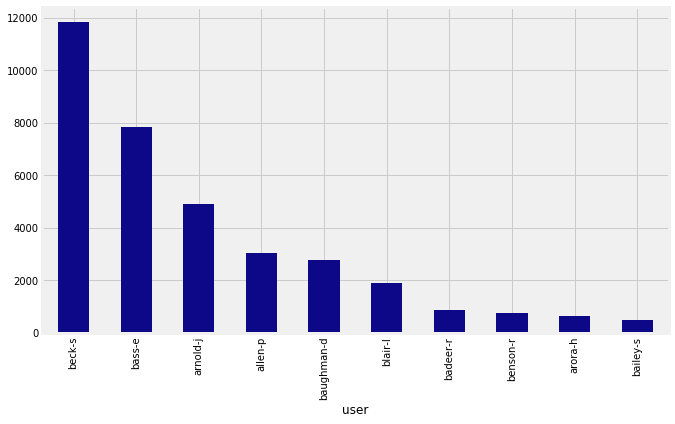

In [23]:
plt.figure(figsize = (10,6))
top_10_frequent.plot(kind = 'bar',colormap="plasma")

 Users and number of emails they sent by year.
- huge increase in quantity of emails in the early 2000's

In [24]:
df.groupby(['user', 'Year'])['file'].count()

user        Year
allen-p     1980      10
            1999       8
            2000    1307
            2001    1704
            2002       5
arnold-j    1980       8
            2000    1832
            2001    3056
            2002       2
arora-h     1980       2
            2000      62
            2001     580
            2002      10
badeer-r    2000     851
            2001       2
            2002      24
bailey-s    2000       1
            2001     127
            2002     350
bass-e      1980       6
            1999      81
            2000    5727
            2001    1534
            2002     473
            2004       2
baughman-d  1980       6
            2000     176
            2001    2145
            2002     433
beck-s      1980      16
            1999      94
            2000    7235
            2001    4095
            2002     390
benson-r    2001     646
            2002     121
blair-l     2001    1873
            2002       6
Name: file, dtype: int64

 Check whether emails were to a single person or multiple people

In [25]:
def split_data(data):
    if data is not None:
        temp = data.split(',')
        if len(temp) == 1:
            return 'Direct'
        else:
            return 'Multiple'
    else:
        return 'Empty'
df['Direct_or_multi'] = df['To'].apply(split_data)

 Top 10 most frequent emailers


In [26]:
df.groupby('user')['Direct_or_multi'].value_counts().sort_values(ascending=False)[:15]

user        Direct_or_multi
beck-s      Direct             7595
bass-e      Direct             5900
arnold-j    Direct             4354
beck-s      Multiple           3960
allen-p     Direct             2631
bass-e      Multiple           1738
baughman-d  Direct             1327
            Multiple           1311
blair-l     Empty               723
            Multiple            656
badeer-r    Direct              544
arora-h     Direct              505
blair-l     Direct              500
arnold-j    Multiple            408
allen-p     Multiple            340
Name: Direct_or_multi, dtype: int64

4.3 Data cleaning

In [27]:
#data cleaning
def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


df['Subject_new'] = df['Subject'].apply(clean_column)
df['body_new'] = df['body'].apply(clean_column)

In [33]:
#importing word cloud and adding stopwords
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm']

for i in to_add:
    stopwords.add(i)

 4.4 Visualise Email Subject

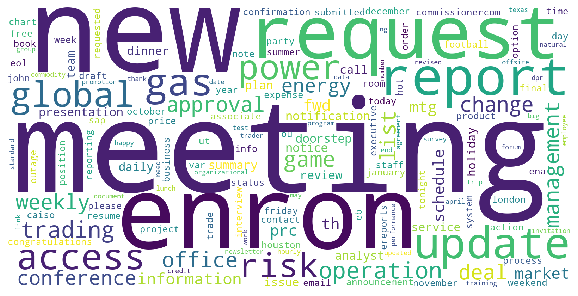

In [34]:
wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(df['Subject_new'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [35]:
#Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.
stemmer = PorterStemmer()
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [36]:
#tokenizes (splits the synopsis into a list of its respective words (or tokens) and also stems each token
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

4.5 TF-IDF tranformation for K-means algorithm

In [43]:
# term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['body_new']
# data.head()

tf_idf_vectorizor = TfidfVectorizer(stop_words = stopwords,tokenizer = tokenize_and_stem,
                             max_features = 5000)
%time tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

C:\Users\rana\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'ca', 'doe', 'dure', 'els', 'fw', 'ha', 'henc', 'hi', 'howev', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpag', 'let', 'must', "n't", 'onc', 'onli', 'otherwis', 'ourselv', 'sha', 'sinc', 'themselv', 'therefor', 'thi', 'veri', 'wa', 'whi', 'wo', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Wall time: 6min 51s


,aaron,ab,abandon,abc,abcsubstringabclength,abel,abelhouectect,abil,abl,abov,...,yr,yvett,z,zadow,zdnet,zero,zhiyong,zip,zipper,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4.6 SK learn Implementation

In [126]:
##we will compute and tabulate cluster quality for different cluster counts

Wall time: 37.2 s
Parser   : 720 ms


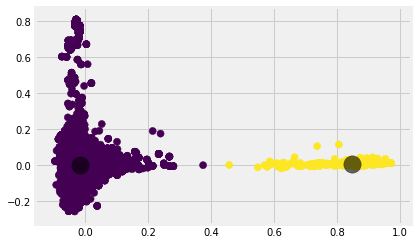

In [86]:
#cluster count 2
#PCA reduces dimensionality.
#The intuition is that PCA seeks to represent all n data vectors as linear combinations of a small number of eigenvectors, and does it to minimize the mean-squared reconstruction error.
#In contrast, K-means seeks to represent all n data vectors via small number of cluster centroids, i.e. to represent them as linear combinations of a small number of cluster centroid 
#vectors where linear combination weights must be all zero except for the single 1. This is also done to minimize the mean-squared reconstruction error.

from sklearn.cluster import KMeans
n_clusters = 2
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [87]:
a2=fitted.labels_ 

In [88]:
#for cluster count 2
print(davies_bouldin_score(Y_sklearn, a2)) 


0.1433498122699349


Wall time: 1min 10s
Parser   : 3.81 s


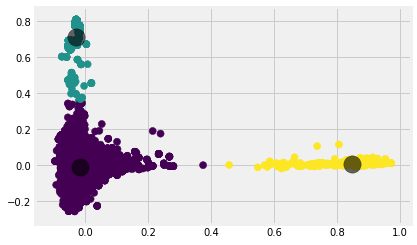

In [95]:
#cluster count 3
n_clusters = 3
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [96]:
a3=fitted.labels_

In [97]:
#for cluster count 3
from sklearn.metrics import davies_bouldin_score 
print(davies_bouldin_score(Y_sklearn, a3)) 


0.16898525354135754


Wall time: 20.3 s
Parser   : 476 ms


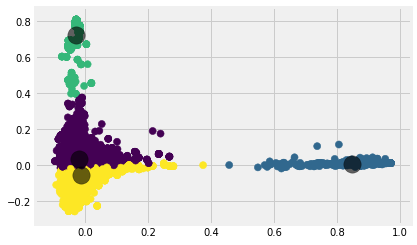

In [80]:
##cluster count 4
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [ ]:
a4=fitted.labels_

In [82]:
# for cluster count 4
print(davies_bouldin_score(Y_sklearn, a4)) 


0.5203524620701652


Wall time: 53.4 s
Parser   : 5.49 s


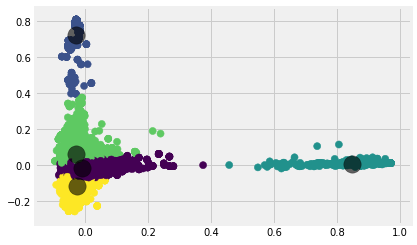

In [83]:
##cluster count 5
n_clusters = 5
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [84]:
a5=fitted.labels_ 

In [85]:
#for cluster count 5
print(davies_bouldin_score(Y_sklearn, a5)) 


0.5366984787572655


In [94]:
#tabulate cluster quality for different cluster counts
#davies_bouldin_score foe different clusters low value is more good
pd.DataFrame(
{"a2" : [0.1433498122699349],
"a3" : [0.1689851884643439],
"a4" : [0.1689851884643439],
"a5" : [0.5366984787572655]},
index = [1])


,a2,a3,a4,a5
1,0.14335,0.168985,0.168985,0.536698


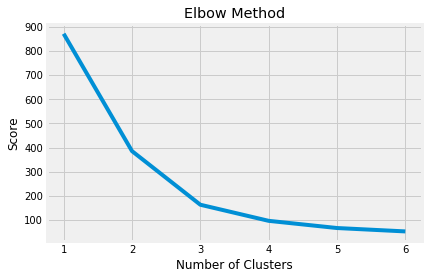

In [98]:
#using elbow method representing a graph showing best cluster count
#optimal cluster count is 3
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [99]:
# we are extracting top features from each clusters and sorting them
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

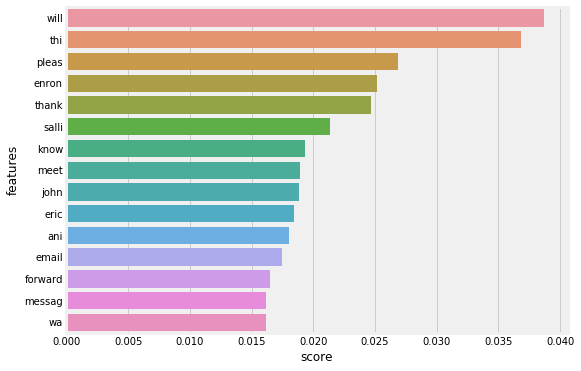

In [100]:
#cluster 1
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

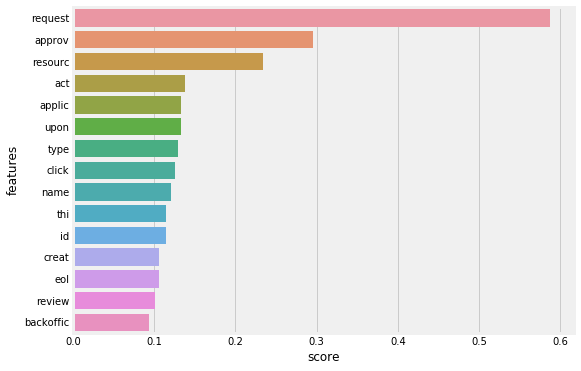

In [101]:
#cluster 2
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:15])

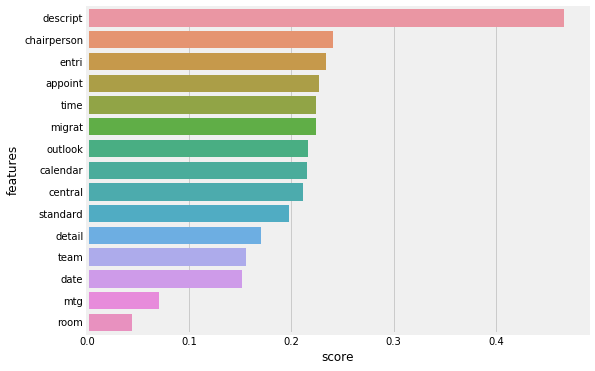

In [102]:
#cluster 3
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[2][:15])